In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Lorenz63:
    def __init__(self, modelSetup=None):
        self.sigma = 10
        self.beta  = 8 / 3
        self.rho   = 24.74
        if modelSetup != None:
            self.x = modelSetup["x"]
            self.y = modelSetup["y"]
            self.z = modelSetup["z"]
            self.dt = modelSetup["dt"]
            self.tLength = modelSetup["tLength"]
            self.scheme = modelSetup["scheme"]

    def dxdt(self, x, y):
        return self.sigma * (y - x)

    def dydt(self, x, y, z):
        return x * (self.rho - z) - y

    def dzdt(self, x, y, z):
        return x * y - self.beta * z
    
    def setInitPoint(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        
    def setDt(self, dt):
        self.dt = dt
        
    def setTimeLength(self, tLength):
        self.tLength = tLength
        
    def setScheme(self, scheme):
        self.scheme = scheme
    
    def getDelta(self):
        if self.scheme == "1stOrderForward":
            dx = self.dxdt(self.x, self.y) * self.dt
            dy = self.dydt(self.x, self.y, self.z) * self.dt
            dz = self.dzdt(self.x, self.y, self.z) * self.dt
            return dx, dy, dz
        elif self.scheme == "RK4":
            # k1
            k1x = self.dxdt(self.x, self.y)
            k1y = self.dydt(self.x, self.y, self.z)
            k1z = self.dzdt(self.x, self.y, self.z)
            # k2
            k2x = self.dxdt(self.x + k1x * self.dt / 2, self.y + k1y * self.dt / 2)
            k2y = self.dydt(self.x + k1x * self.dt / 2, self.y + k1y * self.dt / 2, self.z + k1z * self.dt / 2)
            k2z = self.dzdt(self.x + k1x * self.dt / 2, self.y + k1y * self.dt / 2, self.z + k1z * self.dt / 2)
            # k3
            k3x = self.dxdt(self.x + k2x * self.dt / 2, self.y + k2y * self.dt / 2)
            k3y = self.dydt(self.x + k2x * self.dt / 2, self.y + k2y * self.dt / 2, self.z + k2z * self.dt / 2)
            k3z = self.dzdt(self.x + k2x * self.dt / 2, self.y + k2y * self.dt / 2, self.z + k2z * self.dt / 2)
            # k4
            k4x = self.dxdt(self.x + k3x * self.dt, self.y + k3y * self.dt)
            k4y = self.dydt(self.x + k3x * self.dt, self.y + k3y * self.dt, self.z + k3z * self.dt)
            k4z = self.dzdt(self.x + k3x * self.dt, self.y + k3y * self.dt, self.z + k3z * self.dt)
            # slope
            dx = (k1x + 2 * k2x + 2 * k3x + k4x) / 6 * self.dt
            dy = (k1y + 2 * k2y + 2 * k3y + k4y) / 6 * self.dt
            dz = (k1z + 2 * k2z + 2 * k3z + k4z) / 6 * self.dt
            return dx, dy, dz

    def evolve(self):
        time = np.arange(0, self.tLength, self.dt)
        xs = np.zeros(shape=time.shape)
        ys = np.zeros(shape=time.shape)
        zs = np.zeros(shape=time.shape)
        xs[0], ys[0], zs[0] = self.x, self.y, self.z
        
        for i, tIdx in enumerate(time[:-1]):
            dx, dy, dz = self.getDelta()
            self.x = xs[i] + dx
            self.y = ys[i] + dy
            self.z = zs[i] + dz
            xs[i+1] = self.x
            ys[i+1] = self.y
            zs[i+1] = self.z
        return time, xs, ys, zs
    
    def getStability(self, x, y, z):
        return -self.beta * self.sigma * (1 - self.rho + z) + x * (self.sigma) * (x + y)

### 1st-order forward

In [3]:
modelSetup = {
    "x": 0.1, 
    "y": 0.0,
    "z": 0.0, 
    "dt": 0.001,
    "tLength": 50,
    "scheme": "1stOrderForward"
}

In [4]:
lorenz63 = Lorenz63(modelSetup)

In [5]:
time, xs1, ys1, zs1 = lorenz63.evolve()

Text(0.5, 0, 'z')

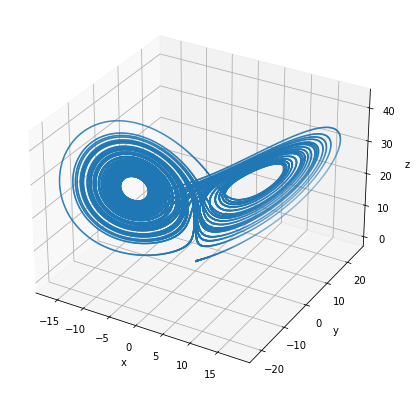

In [6]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs1, ys1, zs1, s=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

### RK4

In [7]:
modelSetup = {
    "x": 0.1, 
    "y": 0.0,
    "z": 0.0, 
    "dt": 0.001,
    "tLength": 50,
    "scheme": "RK4"
}

In [8]:
lorenz63 = Lorenz63(modelSetup)

In [9]:
time, xsr, ysr, zsr = lorenz63.evolve()

Text(0.5, 0, 'z')

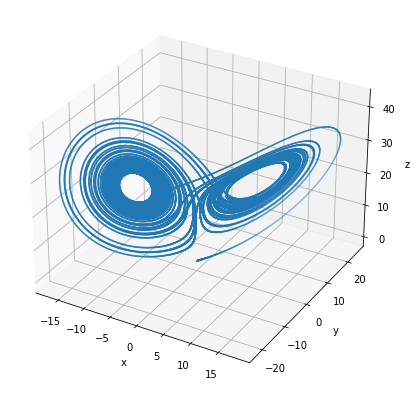

In [10]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(xsr, ysr, zsr, s=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

### Comparison

0.01
0.001
0.0001
1e-05


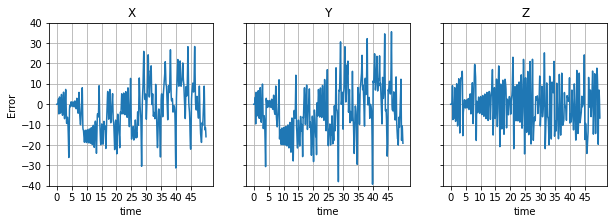

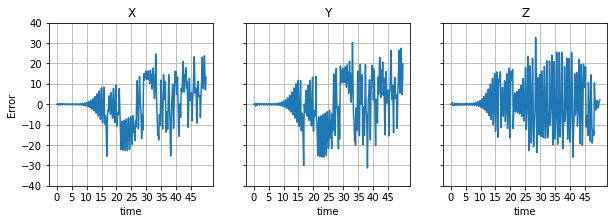

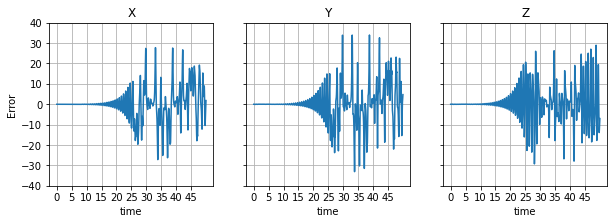

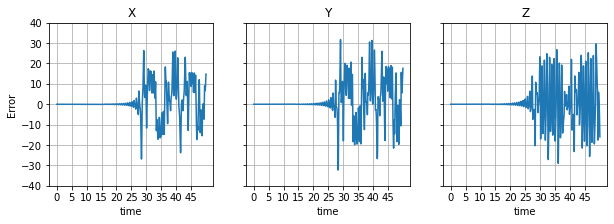

In [11]:
for dt in np.array([0.01, 0.001, 0.0001, 0.00001]):
    print(dt)
    modelSetup = {
    "x": 0.1, 
    "y": 0.0,
    "z": 0.0, 
    "dt": dt,
    "tLength": 50,
    "scheme": "1stOrderForward"
    }
    lorenz63 = Lorenz63(modelSetup)
    time, xs1, ys1, zs1 = lorenz63.evolve()
    modelSetup = {
    "x": 0.1, 
    "y": 0.0,
    "z": 0.0, 
    "dt": dt,
    "tLength": 50,
    "scheme": "RK4"
    }
    lorenz63 = Lorenz63(modelSetup)
    time, xsr, ysr, zsr = lorenz63.evolve()
    
    fig, axs = plt.subplots(1, 3, figsize=(10, 3), sharey=True)
    axs[0].plot(time, xsr - xs1)
    axs[0].grid(True)
    axs[1].plot(time, ysr - ys1)
    axs[1].grid(True)
    axs[2].plot(time, zsr - zs1)
    titles = ["X", "Y", "Z"]
    axs[0].set_ylabel("Error")
    for i in range(3):
        axs[i].set_xlabel("time")
        axs[i].set_ylim(-40, 40)
        axs[i].set_xticks(np.arange(0, 50, 5))
        axs[i].set_title(titles[i])
        axs[i].grid(True)


### Stability 

In [12]:
import numpy as np
sigma, beta, rho = 10, 8 / 3, 24.74
dt = 1/10
n = 50
L = np.array([[-sigma, sigma, 0], 
              [rho, -1, 0], 
              [0, 0, -beta]])
print(np.eye(3) + L * dt)
print(np.linalg.det(np.eye(3) + L * dt))

[[0.         1.         0.        ]
 [2.474      0.9        0.        ]
 [0.         0.         0.73333333]]
-1.8142666666666667


In [13]:
sigma, beta, rho = 10, 8 / 3, 24.74
xBar, yBar, zBar = 0, 0, rho
dt = 1e-5
n = 50
L = np.array([[-sigma, sigma, 0], 
              [rho-zBar, -1, xBar], 
              [yBar, xBar, -beta]])
print(np.eye(3) + L * dt)
print(np.linalg.det(np.eye(3) + L * dt))

[[9.99900000e-01 1.00000000e-04 0.00000000e+00]
 [0.00000000e+00 9.99990000e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.99973333e-01]]
0.9998633372666401
